# **CUSTOMER COMPLAINTS ANALYSIS USING NER AND SUMMARIZATION**

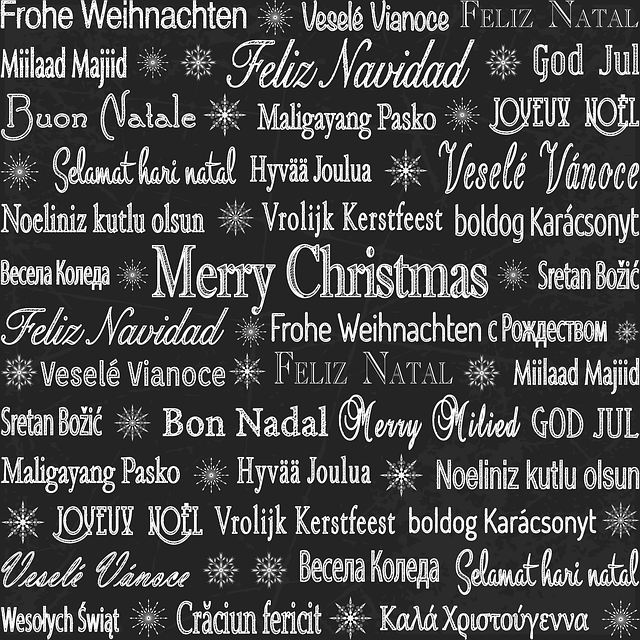

## **Project Description:**

This project leverages Natural Language Processing (NLP) to analyze customer complaints in the banking sector. The primary goal is to extract key entities from complaint texts and summarize the content efficiently. Using a bank-customer-complaints dataset, the project integrates Named Entity Recognition (NER) and summarization to extract and provide concise, actionable insights from large volumes of complaints.

## **Business Objectives:**

1. **Improved Customer Experience:** Quickly analyze complaints to identify common issues and frequently mentioned entities (e.g., products, services, locations).

2. **Prioritization of Issues:** Automatically categorize complaints based on extracted entities and summaries, enabling more effective prioritization and faster resolution.

3. **Operational Efficiency:** Reduce the manual effort needed for customer support teams to read and categorize complaints by automating the process.

4. **Trend Analysis:** Identify recurring problems or emerging trends in customer feedback through summarized complaint data and entity recognition.

## **Problem Statement:**

Customer complaints often contain unstructured text, which makes it challenging for companies to efficiently process and act upon the feedback. Without automated methods to recognize key entities such as product names, locations, and complaint categories, valuable insights may go unnoticed. Additionally, summarization is needed to provide concise overviews of lengthy complaints, allowing for quicker analysis and decision-making. This project aims to address these challenges by applying Named Entity Recognition (NER) to extract key entities and text summarization to condense the complaint data, facilitating faster and more effective responses to customer concerns.

## **Expected Outcomes:**

1. **A Named Entity Recognition system that identifies key entities** such as product names, locations, and financial terms in customer complaints.

2. **An extractive summarization model that condenses** lengthy complaints into key points while retaining important details.

3. **A pipeline that integrates both NER and summarization** to provide structured, concise, and actionable insights from customer complaints.

## **Data:**

The data is obtained from Kaggle https://kaggle/datasets

### **CREATING ENVIRONMENT**

In [ ]:
#!pip install spacy

In [ ]:
#!python -m spacy download en_core_web_sm

In [ ]:
#!pip install nltk

In [ ]:
!pip install pytextrank

In [ ]:
!pip install rouge-score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=c270d8e532277cfcf75ac3d08132cec0a38000ffd92309d1774d6a71b06f739a
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge-score


In [ ]:
#Import the necessary libraries and dependencies
import pandas as pd
import zipfile
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from collections import Counter
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
import spacy
import pytextrank
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from textblob import TextBlob
import numpy as np
from collections import Counter
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics.pairwise import cosine_similarity
import plotly.express as px

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/local/lib/python3.11/dist-packages


### **DATA PREPARATION**

In [ ]:
# Specify the path to the ZIP file
zip_path = '/content/Bank Customer Complaint Analysis.zip'

# Open the ZIP file
with zipfile.ZipFile(zip_path, 'r') as z:
    # List files in the ZIP to ensure 'complaints.csv' exists
    print(z.namelist())

    # Read the CSV file into a pandas DataFrame
    with z.open('complaints.csv') as file:
        df = pd.read_csv(file)

# Display the first few rows of the DataFrame
print(df.head())


['Bank Customer Complaint Analysis for Efficient Dispute Resolution.ipynb', 'complaints.csv', 'complaints_report_20240226_183305.txt', 'final_dataframe (1).csv']
   Unnamed: 0           product  \
0           0       credit_card   
1           1       credit_card   
2           2    retail_banking   
3           3  credit_reporting   
4           4  credit_reporting   

                                           narrative  
0  purchase order day shipping amount receive pro...  
1  forwarded message date tue subject please inve...  
2  forwarded message cc sent friday pdt subject f...  
3  payment history missing credit report speciali...  
4  payment history missing credit report made mis...  


In [ ]:
df.shape

(162421, 3)

#### **DATA CLEANING**


*   Data Uniformity
*   Data Completion
*   Data






In [ ]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

**Data Completion**

In [ ]:
#Identify the number of null values
df.isnull().sum()

product       0
narrative    10
dtype: int64

There are 10 null values in the narrative column

In [ ]:
#Drop null values
df.dropna(inplace = True)

In [ ]:
#Check the number of duplicated values
df.duplicated().sum()

37735

A total of 37735 duplicated rows

In [ ]:
#Drop dupicated rows
df.drop_duplicates(inplace = True)

### **DATA PREPROCESSING**

Clean and prepare the text for analysis:

1. **Remove unnecessary elements:**

Strip irrelevant details (e.g., forwarded message, cc, sent, etc.).

2. **Lowercasing:**

Convert text to lowercase to reduce variation (e.g., Payment and payment are treated the same).

3. **Tokenization:**

Split the text into words or sentences.

4. **Stopword Removal:**

Remove common words like "the," "and," or "of" that may not contribute to the analysis.

5. **Lemmatization:**

Reduce words to their base forms (e.g., received → receive).

6. **Remove special characters:**

Eliminate punctuation, numbers, and non-alphabetic characters unless relevant.


**Text Cleaning**

In [ ]:
def clean_text(text):
    # Remove unwanted headers or common irrelevant patterns
    text = re.sub(r"forwarded message.*?:", "", text, flags=re.IGNORECASE)
    text = re.sub(r"cc:.*|sent:.*|date:.*", "", text, flags=re.IGNORECASE)
    # Remove special characters and extra whitespace
    text = re.sub(r"[^a-zA-Z0-9\s.,$]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

**Lower Casing**

In [ ]:
def lowercase_text(text):
    return text.lower()

**Removing Stopwords**

In [ ]:
def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    words = text.split()
    filtered_text = " ".join(word for word in words if word.lower() not in stop_words)
    return filtered_text

**Tokenization**

In [ ]:
def tokenize_text(text):
    return word_tokenize(text)

**Lemmatization**

In [ ]:
nlp = spacy.load("en_core_web_sm")
def lemmatize_text(tokens):
    # Convert tokens back to a single text string for spaCy processing
    doc = nlp(" ".join(tokens))
    # Extract lemmas for each token
    return [token.lemma_ for token in doc if not token.is_punct]

**Intergrate Preprocessing**

In [ ]:
def preprocess_text(text):
    # Step 1: Clean text
    text = clean_text(text)

    # Step 2: Lowercase text
    text = lowercase_text(text)

    # Step 3: Tokenize text
    tokens = tokenize_text(text)

    # Step 4: Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.lower() not in stop_words]

    # Step 5: Lemmatize tokens
    lemmatized_tokens = lemmatize_text(tokens)

    # Return the processed tokens as a single string
    return " ".join(lemmatized_tokens)


In [ ]:
# Apply preprocess_text to each row in the 'narrative' column
df['processed_narrative'] = df['narrative'].apply(preprocess_text)

In [ ]:
df.columns

Index(['product', 'narrative', 'processed_narrative'], dtype='object')

In [ ]:
df.head()

product                                          narrative  \
0       credit_card  purchase order day shipping amount receive pro...   
1       credit_card  forwarded message date tue subject please inve...   
2    retail_banking  forwarded message cc sent friday pdt subject f...   
3  credit_reporting  payment history missing credit report speciali...   
4  credit_reporting  payment history missing credit report made mis...   

                                 processed_narrative  
0  purchase order day shipping amount receive pro...  
1  forward message date tue subject please invest...  
2  forward message cc send friday pdt subject fin...  
3  payment history miss credit report specialized...  
4  payment history miss credit report make mistak...

In [ ]:
# Save the DataFrame to a CSV file
#df.to_csv('preprocessed_data.csv', index=False)
prepro_data = pd.read_csv('preprocessed_data.csv')
prepro_data.head()

product                                          narrative  \
0       credit_card  purchase order day shipping amount receive pro...   
1       credit_card  forwarded message date tue subject please inve...   
2    retail_banking  forwarded message cc sent friday pdt subject f...   
3  credit_reporting  payment history missing credit report speciali...   
4  credit_reporting  payment history missing credit report made mis...   

                                 processed_narrative  
0  purchase order day shipping amount receive pro...  
1  forward message date tue subject please invest...  
2  forward message cc send friday pdt subject fin...  
3  payment history miss credit report specialized...  
4  payment history miss credit report make mistak...

### **EDA**


1. **Category Distribution:** Check the number of samples per product type for balance.
2. **Word Clouds:** Visualize common words for each product category.
3. **Word Frequency Analysis:** Identify frequently used words or bigrams (two-word phrases).






**Category Distribution**

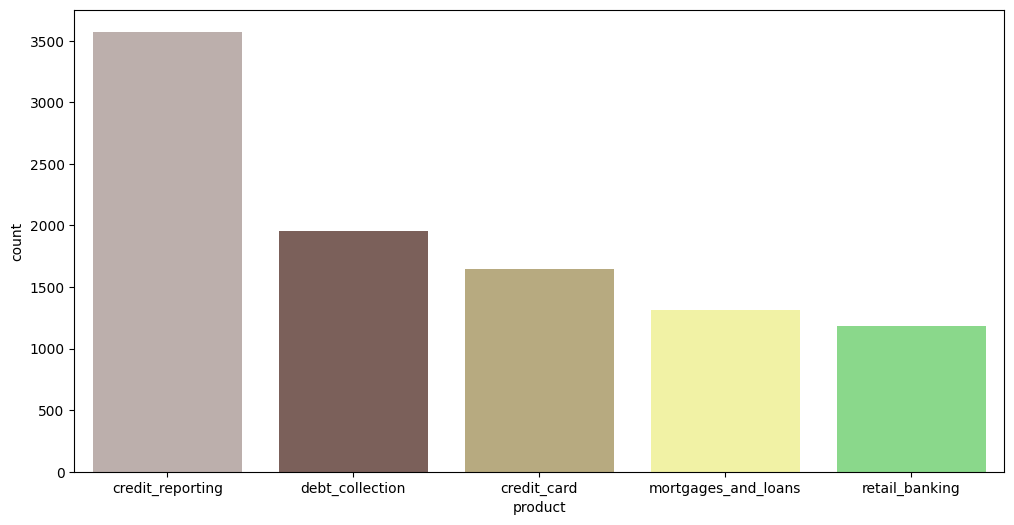

In [ ]:
sorted = prepro_data['product'].value_counts(ascending=False).index
current_palette = sns.color_palette("terrain_r", 7)
plt.figure(figsize = (12,6))
sns.countplot(data=prepro_data, x='product', order=sorted, palette = current_palette)
plt.show()

**WordCloud**

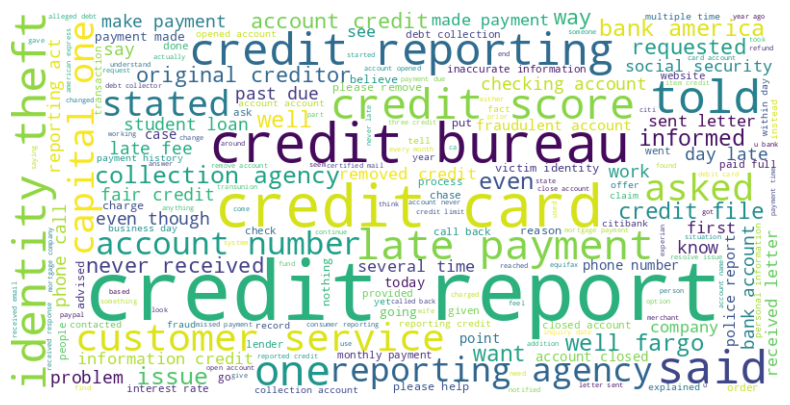

In [ ]:
# Combine all narratives into one string
all_text = " ".join(prepro_data['narrative'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


Words with the larrgets font are the most frequent, while those with lesser frequency have a lesser font. **Credit, report, identity, agency,credit card** are among the most frequently used words. **Remove account, day later, alleged debt** are among the less frequently used words.

**Token Analysis**

count    67860.000000
mean       598.387062
std        725.976793
min          3.000000
25%        219.000000
50%        401.000000
75%        717.000000
max      20596.000000
Name: narrative_length, dtype: float64


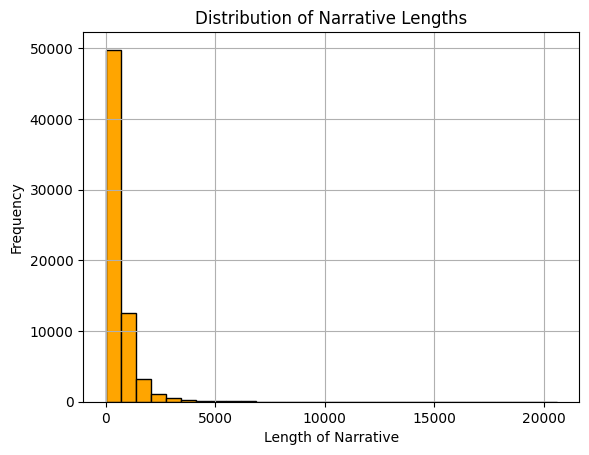

In [ ]:
# Add a column with narrative lengths
prepro_data['narrative_length'] = prepro_data['narrative'].apply(len)

# Summary statistics for text lengths
print(prepro_data['narrative_length'].describe())

# Plot text length distribution
prepro_data['narrative_length'].hist(bins=30, color='orange', edgecolor='black')
plt.title("Distribution of Narrative Lengths")
plt.xlabel("Length of Narrative")
plt.ylabel("Frequency")
plt.show()


The narrative are not too lenghthy with most sentences with less than 500 words.

### **FEATURE ENGINEERING**

Preparing the data to make sense and meaning by using the below feature engineering tasks. Not all information is important so feature engineering curates the data be meaningfully extracted for the model t learn from.


1. **Named Entity Features:** Extract named entities as additional features. Use pre-trained models (e.g., SpaCy, NLTK, Hugging Face Transformers) to extract entities. Annotate and add entities as a feature for summarization (e.g., a column listing the entities for each document).
2. **Word Embeddings:** Contextual embeddings (e.g., BERT, RoBERTa) improve NER and summarization by capturing semantic meaning and word dependencies. Extract embeddings for each word or token in the text. Use these embeddings as input to NER and summarization models.
3. **Sentence Tokenization:** Summarization often works better on sentence-level inputs rather than paragraphs.Split text into sentences using libraries like nltk or SpaCy.

**Named Entity Features(NER)**

Extract entities from the original processed_narrative.


In [ ]:
import spacy

# Load SpaCy's small English model
nlp = spacy.load("en_core_web_sm")

# Example function to extract entities
def extract_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]


In [ ]:
# Apply to your dataset
prepro_data['true_entities'] = prepro_data['processed_narrative'].apply(extract_entities)

**Sentence Tokenization**

Sentence tokenization prepares the text for summarization and other analyses.

In [ ]:
# Function to tokenize into sentences
def tokenize_sentences(text):
    return nltk.sent_tokenize(text)

In [ ]:
# Apply to your dataset
prepro_data['sentences'] = prepro_data['processed_narrative'].apply(tokenize_sentences)

### **Summarization Integration**

**Extractive Summarization using Spacy with TextRank**

Summarize the cleaned text to reduce redundancy while retaining key information. Summarization reduces the volume of text and guides NER to focus on the most important sections. This step is valid if your goal is to compare NER performance on summarized vs. original text.

In [ ]:
# Load SpaCy with pytextrank
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("textrank")

# Extractive summarization function
def extractive_summary_spacy(text, ratio=0.2):
    doc = nlp(text)
    sentences = [sent.text for sent in doc._.textrank.summary(limit_phrases=5)]
    return " ".join(sentences)

In [9]:
# Apply summarization
prepro_data['summary'] = prepro_data['processed_narrative'].apply(extractive_summary_spacy)

**Evaluate summarization using Cosine-Similarity**

**Analyze the Evaluation Results:**

*High Similarity Scores:* If most rows have high similarity scores (> 0.8), your summaries might be too similar to the original text, suggesting redundancy.

*Low Similarity Scores:* If many rows have low similarity scores (< 0.2), your summarization might not effectively capture the key points.

*Balanced Scores:* A mix of high, medium, and low scores might indicate that the summarizer performs inconsistently.





In [10]:
# Function to calculate cosine similarity between the original and the generated summary
def calculate_cosine_similarity(original_text, summary_text):
    # Create the TF-IDF vectorizer
    vectorizer = TfidfVectorizer()

    # Combine the original text and the generated summary into a list
    texts = [original_text, summary_text]

    # Vectorize the texts
    tfidf_matrix = vectorizer.fit_transform(texts)

    # Compute cosine similarity
    cosine_sim = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])

    # Return the cosine similarity score
    return cosine_sim[0][0]

In [11]:
# Apply cosine similarity evaluation for each row
prepro_data['cosine_similarity'] = prepro_data.apply(
    lambda row: calculate_cosine_similarity(row['processed_narrative'], row['summary']), axis=1
)

In [12]:
# Total number of rows
total_rows = len(prepro_data)

# Number of rows with cosine_similarity > 0.8
high_similarity_count = len(prepro_data[prepro_data['cosine_similarity'] > 0.8])

# Number of rows with cosine_similarity < 0.2
low_similarity_count = len(prepro_data[prepro_data['cosine_similarity'] < 0.2])

# Calculate percentages
high_similarity_percentage = (high_similarity_count / total_rows) * 100
low_similarity_percentage = (low_similarity_count / total_rows) * 100

# Print the percentages
print(f"Percentage of rows with cosine_similarity > 0.8: {high_similarity_percentage:.2f}%")
print(f"Percentage of rows with cosine_similarity < 0.2: {low_similarity_percentage:.2f}%")



Percentage of rows with cosine_similarity > 0.8: 99.96%
Percentage of rows with cosine_similarity < 0.2: 0.00%


99.96% of the summarized texts have a cosine similarity of 0.8>, to the original text. This means that we can  rely on our model for summazrization. Summarizations with < 0.2 are at 0.00%. We can be confident that we have not lost any important information during summarization.

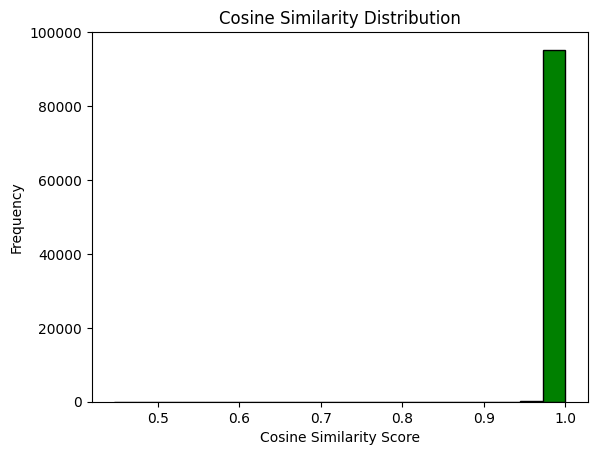

In [13]:
# Plot histogram of cosine similarity scores
plt.hist(prepro_data['cosine_similarity'], bins=20, color='green', edgecolor='black')
plt.title('Cosine Similarity Distribution')
plt.xlabel('Cosine Similarity Score')
plt.ylabel('Frequency')
plt.show()

**Perform NER on summarized text**

This task aims at extracting entities form the summarized texts. Previously entity extraction was done on the original text. We will now obtain the predicted entities.

In [14]:
# Load the SpaCy model
nlp = spacy.load('en_core_web_sm')

def extract_named_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

In [15]:
# Apply NER to the summaries
prepro_data['predicted_entities'] = prepro_data['summary'].apply(extract_named_entities)

In [16]:
#Counts the number of elements in each predicted entity
all_entities = [ent for entities in prepro_data['predicted_entities'] for ent in entities]
entity_counts = Counter([ent[1] for ent in all_entities])
print(entity_counts)

Counter({'DATE': 102032, 'CARDINAL': 43446, 'ORG': 35415, 'ORDINAL': 21245, 'GPE': 11585, 'NORP': 10998, 'TIME': 9298, 'PERSON': 8794, 'MONEY': 808, 'FAC': 331, 'LOC': 322, 'LAW': 222, 'PRODUCT': 168, 'QUANTITY': 138, 'LANGUAGE': 136, 'PERCENT': 78, 'EVENT': 57, 'WORK_OF_ART': 34})


**Visualize the number of entities for both summarized and original texts**

To enusre that no entity is lost when summarization was done , we can visualize the number of entities for both the original full text and the summarized text.

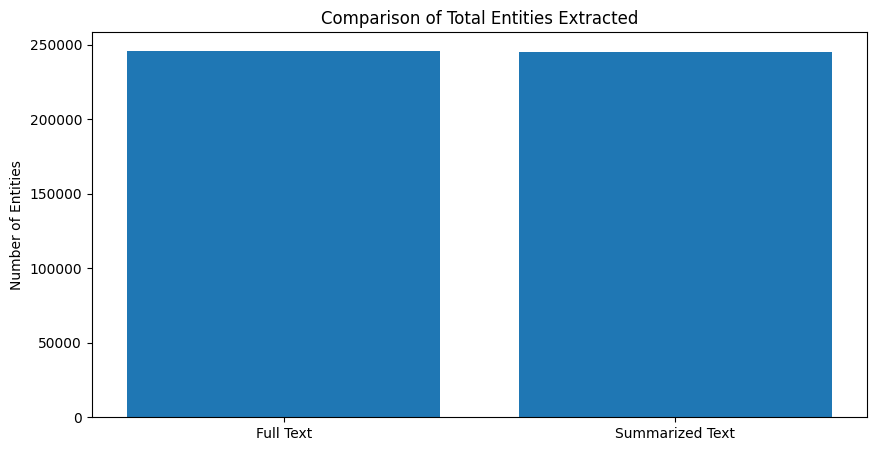

In [17]:
#Create visiualization of number of entities
full_entity_counts = prepro_data['true_entities'].apply(len)
summary_entity_counts = prepro_data['predicted_entities'].apply(len)

#Plot
plt.figure(figsize=(10, 5))
plt.bar(['Full Text', 'Summarized Text'], [full_entity_counts.sum(), summary_entity_counts.sum()])
plt.title('Comparison of Total Entities Extracted')
plt.ylabel('Number of Entities')
plt.show()


We have not lost any entities. Both texts have the same number of entities. We can be confident that we have not lost any important information while summarizing.

**Highlight entities in the summarized text**

In [18]:
#Create a function
def highlight_entities(summary, entities):
    for entity, label in entities:
        summary = summary.replace(entity, f"[{entity} ({label})]")
    return summary

In [19]:
# Highlighted summaries with true entities
prepro_data['highlighted_true_entities'] = prepro_data.apply(
    lambda row: highlight_entities(row['summary'], row['true_entities']), axis=1
)

# Highlighted summaries with predicted entities
prepro_data['highlighted_predicted_entities'] = prepro_data.apply(
    lambda row: highlight_entities(row['summary'], row['predicted_entities']), axis=1
)


**Match Entities**

In [35]:
# Flatten entity lists safely
def flatten_entities(entity_list):
    return [(ent[0].lower(), ent[1]) for ent in entity_list if isinstance(ent, tuple)]  # Normalize case for comparison


#Compute_metrics function
def compute_metrics(true_entities, predicted_entities):
    # Flatten the entity lists
    true_labels = flatten_entities(true_entities)
    pred_labels = flatten_entities(predicted_entities)

    print(f"True Entities: {true_labels}")  # Debugging
    print(f"Predicted Entities: {pred_labels}")  # Debugging

    # Compare entity sets
    true_set = set(true_labels)
    pred_set = set(pred_labels)

    # Calculate True Positives, False Positives, False Negatives
    tp = len(true_set & pred_set)  # Correct matches
    fp = len(pred_set - true_set)  # Over-predicted
    fn = len(true_set - pred_set)  # Under-predicted

    # Precision, Recall, F1
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

    print(f"Precision: {precision}, Recall: {recall}, F1: {f1}")  # Debugging

    return precision, recall, f1


In [36]:
# Apply to dataset
prepro_data['metrics'] = prepro_data.apply(
    lambda row: compute_metrics(row['true_entities'], row['predicted_entities']), axis=1
)

Streaming output truncated to the last 5000 lines.
Predicted Entities: []
Precision: 0, Recall: 0, F1: 0
True Entities: []
Predicted Entities: []
Precision: 0, Recall: 0, F1: 0
True Entities: [('new york', 'GPE')]
Predicted Entities: [('new york', 'GPE')]
Precision: 1.0, Recall: 1.0, F1: 1.0
True Entities: []
Predicted Entities: []
Precision: 0, Recall: 0, F1: 0
True Entities: [('monthly', 'DATE')]
Predicted Entities: [('monthly', 'DATE')]
Precision: 1.0, Recall: 1.0, F1: 1.0
True Entities: [('monthly', 'DATE')]
Predicted Entities: [('monthly', 'DATE')]
Precision: 1.0, Recall: 1.0, F1: 1.0
True Entities: [('monthly', 'DATE')]
Predicted Entities: [('monthly', 'DATE')]
Precision: 1.0, Recall: 1.0, F1: 1.0
True Entities: []
Predicted Entities: []
Precision: 0, Recall: 0, F1: 0
True Entities: [('million', 'CARDINAL'), ('thursday', 'DATE'), ('million', 'CARDINAL'), ('american', 'NORP'), ('thursday', 'DATE')]
Predicted Entities: [('million', 'CARDINAL'), ('thursday', 'DATE'), ('million', 'CA

In [37]:
# Average metrics
avg_precision = prepro_data['metrics'].apply(lambda x: x[0]).mean()
avg_recall = prepro_data['metrics'].apply(lambda x: x[1]).mean()
avg_f1 = prepro_data['metrics'].apply(lambda x: x[2]).mean()

print(f"Average Precision: {avg_precision:.2f}")
print(f"Average Recall: {avg_recall:.2f}")
print(f"Average F1-Score: {avg_f1:.2f}")

Average Precision: 0.71
Average Recall: 0.71
Average F1-Score: 0.71


**Evaluate on Entity level**

In [38]:
from collections import defaultdict

# Evaluate by entity type
def entity_level_metrics(true_entities_col, predicted_entities_col):
    entity_metrics = {}

    for true_entities, predicted_entities in zip(true_entities_col, predicted_entities_col):
        for entity, label in true_entities:  # Ensure looping through entities
            if label not in entity_metrics:
                entity_metrics[label] = []

            metrics = compute_metrics(
                [ent for ent in true_entities if ent[1] == label],
                [ent for ent in predicted_entities if ent[1] == label]
            )

            entity_metrics[label].append(metrics)

    print("Entity Metrics Collected:", entity_metrics)  # Debugging

    # Compute average metrics for each entity type
    for entity_type in entity_metrics:
        values = list(zip(*entity_metrics[entity_type]))  # Transpose list of tuples
        entity_metrics[entity_type] = tuple(sum(v) / len(v) for v in values)

    return entity_metrics


In [39]:
# Apply on the dataset
entity_results = entity_level_metrics(prepro_data['true_entities'], prepro_data['predicted_entities'])
for entity_type, metrics in entity_results.items():
    print(f"{entity_type}: {metrics}")

Streaming output truncated to the last 5000 lines.
Precision: 1.0, Recall: 1.0, F1: 1.0
True Entities: [('several month ago', 'DATE'), ('several week later', 'DATE'), ('monday', 'DATE'), ('today', 'DATE'), ('today', 'DATE')]
Predicted Entities: [('several month ago', 'DATE'), ('several week later', 'DATE'), ('monday', 'DATE'), ('today', 'DATE'), ('today', 'DATE')]
Precision: 1.0, Recall: 1.0, F1: 1.0
True Entities: [('illinois', 'GPE')]
Predicted Entities: [('illinois', 'GPE')]
Precision: 1.0, Recall: 1.0, F1: 1.0
True Entities: [('second', 'ORDINAL'), ('second', 'ORDINAL')]
Predicted Entities: [('second', 'ORDINAL'), ('second', 'ORDINAL')]
Precision: 1.0, Recall: 1.0, F1: 1.0
True Entities: [('several month ago', 'DATE'), ('several week later', 'DATE'), ('monday', 'DATE'), ('today', 'DATE'), ('today', 'DATE')]
Predicted Entities: [('several month ago', 'DATE'), ('several week later', 'DATE'), ('monday', 'DATE'), ('today', 'DATE'), ('today', 'DATE')]
Precision: 1.0, Recall: 1.0, F1: 1.

In [ ]:
entity_results = entity_level_metrics(prepro_data['true_entities'], prepro_data['predicted_entities'])
print(entity_results)


**Visualize Results**

In [40]:
# Convert metrics to DataFrame
entity_df = pd.DataFrame(entity_results).T.reset_index()
entity_df.columns = ["Entity Type", "Precision", "Recall", "F1-Score"]

# Plot
fig = px.bar(entity_df, x="Entity Type", y=["Precision", "Recall", "F1-Score"],
             barmode="group", title="NER Performance by Entity Type")
fig.show()


### **CONCLUSION**

**Consistency:**

Most entity types (e.g., DATE, ORG, PERSON, etc.) have consistently high Precision, Recall, and F1-Score close to 1.0 (100%), indicating excellent performance.

**Outliers:**

For some entity types, such as PRODUCT, QUANTITY, or EVENT, the metrics appear slightly lower. This might indicate:
Fewer examples in the dataset for these entities.
Difficulty in identifying these entity types accurately.

**High-Performing Entities:**

Entities like DATE, CARDINAL, ORDINAL, GPE (Geopolitical Entity), and ORG (Organization) show near-perfect metrics. This suggests that the model performs very well on these entity types, likely because they are more frequent or easier to identify.

**Entity Type Coverage:**

The chart includes a wide variety of entity types (DATE, TIME, PERSON, etc.), which shows the versatility of the model.

### **RECOMMENDATIONS:**

1. **Incorporate into Business Processes:**

**Customer Feedback Analysis:** Summarize and extract entities from customer complaints to identify trends (e.g., delays, product issues).

**Operational Efficiency:** Automate report generation by extracting key entities like dates, times, and organizations.

**Compliance Monitoring:** Highlight critical entities like LAW, MONEY, and PERCENT in regulatory or financial documents.

2. **Integrate with existing Systems:**

**CRM Tools:** Integrate the NER model with customer relationship management (CRM) tools to identify key customer details automatically.

**Search Engines:** Use extracted entities to improve search relevance (e.g., by tagging documents with entities like ORG, PERSON, and GPE).

**Knowledge Bases:** Build or enhance knowledge bases by automatically tagging documents with entities.

3. **Highlight Business Impact:**

**Time Savings:** Automating tasks like entity extraction can save significant time compared to manual efforts.

**Data-Driven Insights:** Enabling better decision-making by summarizing and highlighting key entities in large datasets.

**Scalability:** Use the model to process large volumes of text data across departments.